# Jamboree

Jamboree has helped thousands of students like you make it to top colleges abroad. Be it GMAT, GRE or SAT, their unique problem-solving methods ensure maximum scores with minimum effort.
They recently launched a feature where students/learners can come to their website and check their probability of getting into the IVY league college. This feature estimates the chances of graduate admission from an Indian perspective.

How can you help here?
- Help Jamboree in understanding what factors are important in graduate admissions and how these factors are interrelated among themselves. It will also help predict one's chances of admission given the rest of the variables.



In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('Jamboree_Admission.csv')

In [3]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [4]:
df.shape

(500, 9)

In [5]:
df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [6]:
df.isna().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

- There is no null value in any columns

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


- Serial No. (Unique row ID)
- GRE Scores (out of 340) : integer
- TOEFL Scores (out of 120) : integer
- University Rating (out of 5) : integer
- Statement of Purpose and Letter of Recommendation Strength (out of 5) : float
- Undergraduate GPA (out of 10) : float
- Research Experience (either 0 or 1) : integer
- Chance of Admit (ranging from 0 to 1) : float

### Unique values in each column

In [8]:
for i in df.columns:
    x=df[i].nunique()
    print(f'{i} column has {x} unique values')

Serial No. column has 500 unique values
GRE Score column has 49 unique values
TOEFL Score column has 29 unique values
University Rating column has 5 unique values
SOP column has 9 unique values
LOR  column has 9 unique values
CGPA column has 184 unique values
Research column has 2 unique values
Chance of Admit  column has 61 unique values


- Here we can see that the serial no is unique to all rows and not a feature for the modelling purpose so we can drop it

### Dropping Serial No. 

In [9]:
# we can drop serial no for creating the model 
df=df.drop(columns=['Serial No.'],axis=1)

In [10]:
df.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


<Axes: >

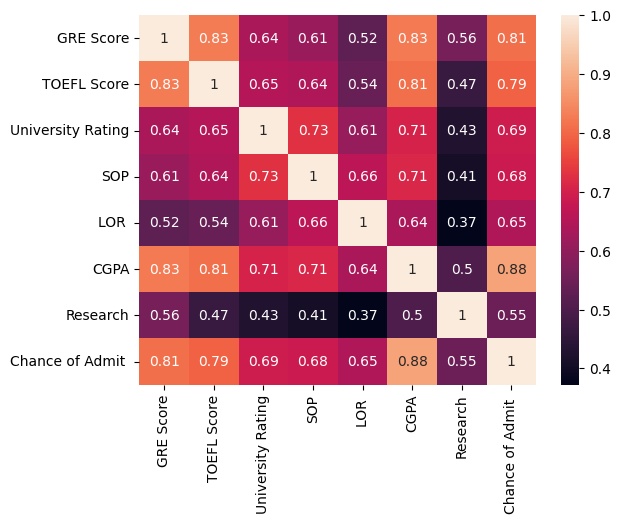

In [11]:
sns.heatmap(df.corr(),annot=True)

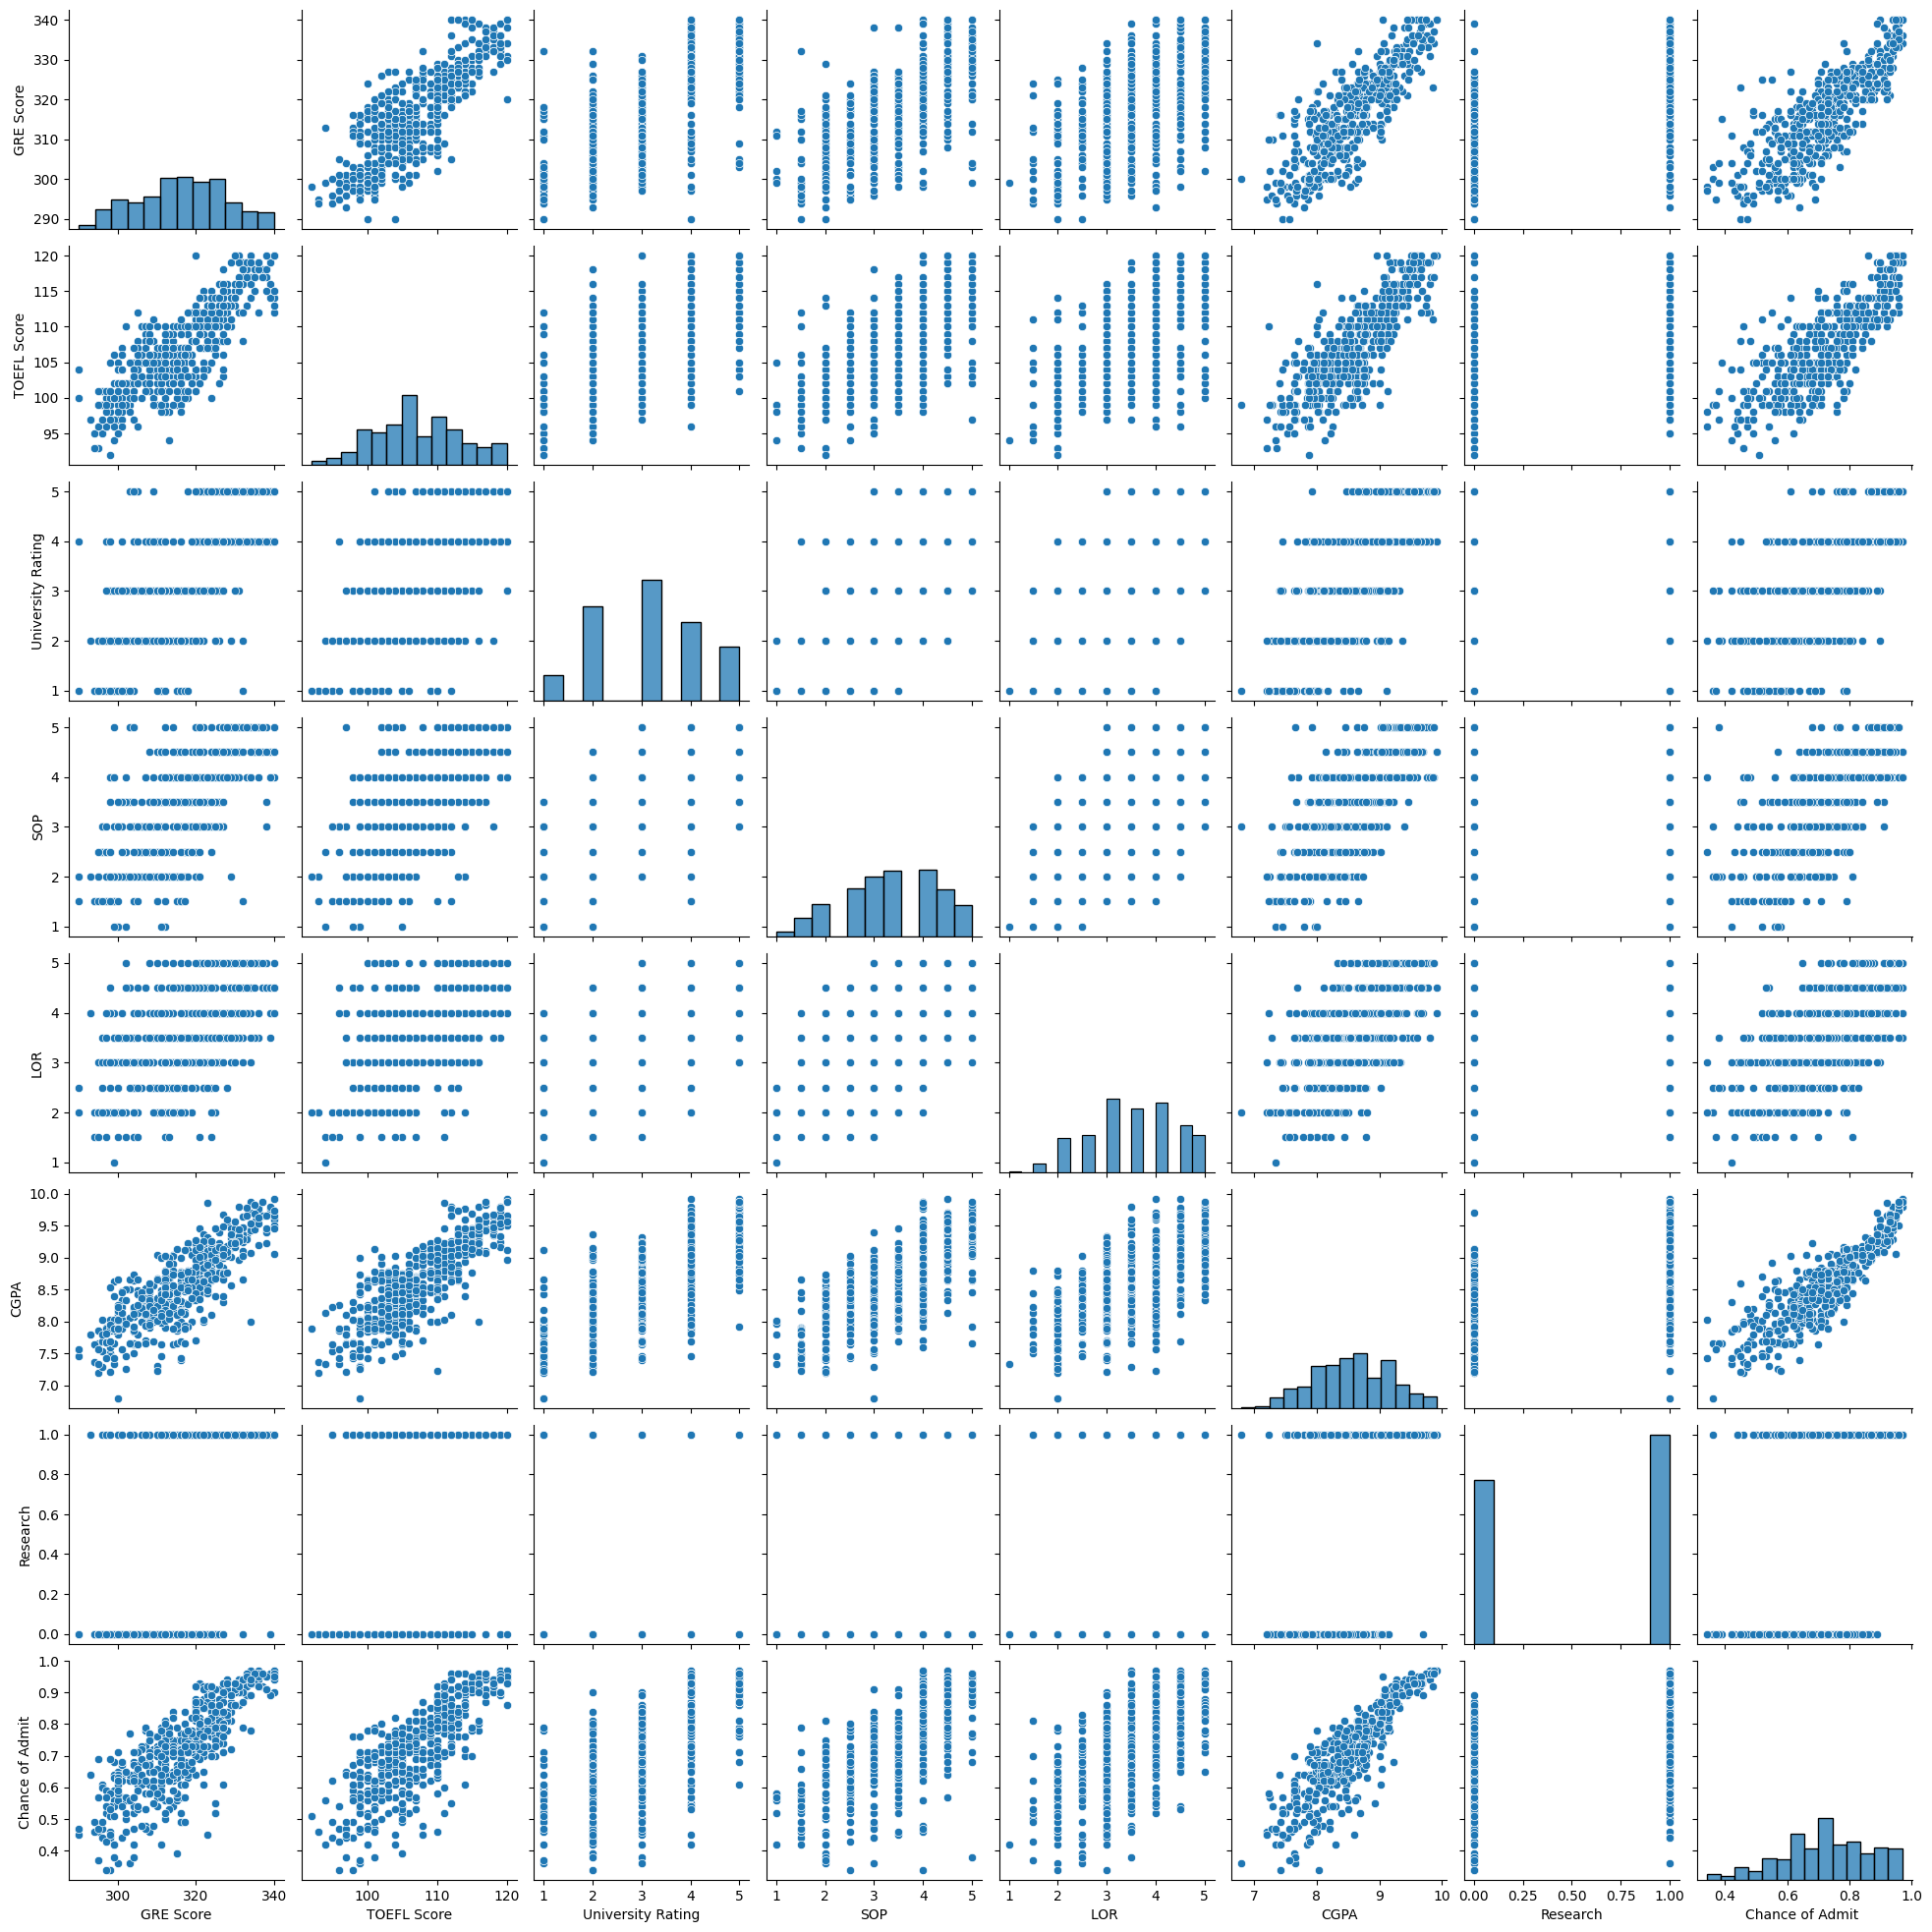

In [315]:
sns.pairplot(df)

### Output i.e; 'Chance of Admit ' correlation with all features

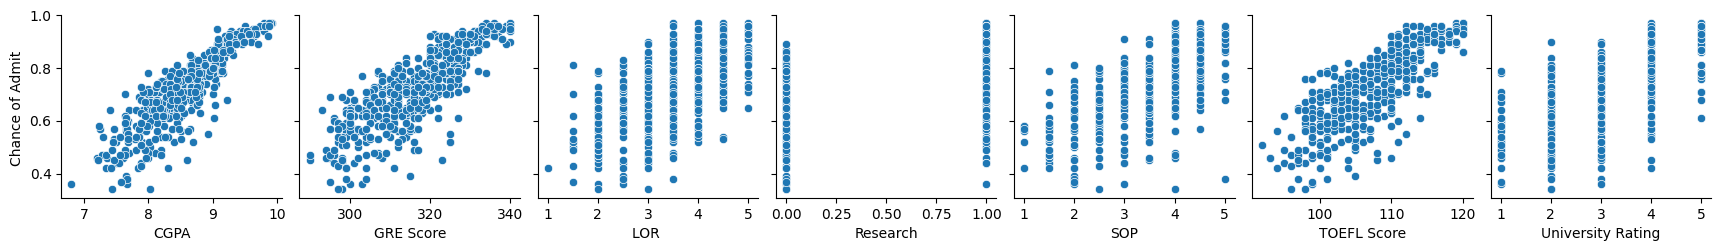

In [316]:
column_to_compare ='Chance of Admit '
sns.pairplot(df,y_vars =[column_to_compare],x_vars =df.columns.difference([column_to_compare]), kind='scatter')

From the above plot we can see that all features have more or less direct correlation with 'chance of Admit'

### Checking Outlier's

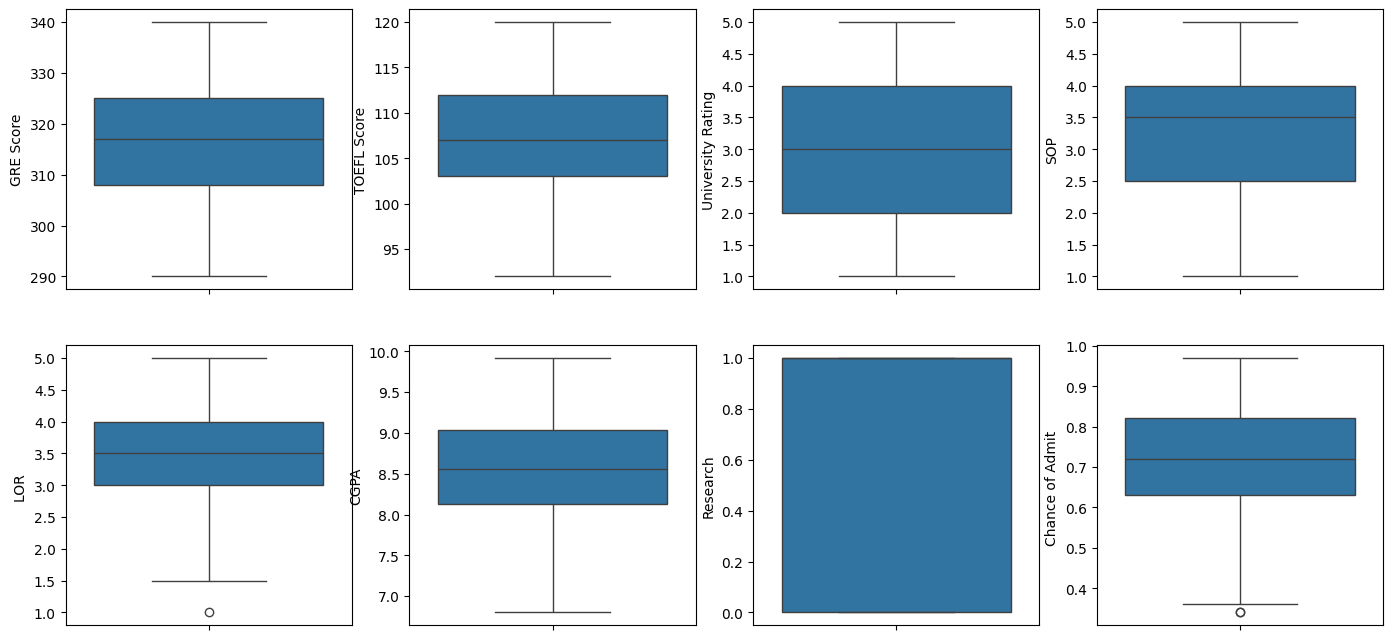

In [317]:
plt.figure(figsize=(17,8))
columns=list(df.columns)
for i in range(1,len(columns)+1):

    plt.subplot(2,4,i)
    sns.boxplot(df[columns[i-1]])

- we can clearly see that there are a few outlier's  in LOR and Chance of Admit 

### Outlier's treatment using IQR

In [318]:
# Function to treat outliers using IQR
def treat_outliers_iqr(dataframe, column, lower_factor=1.5, upper_factor=1.5):
    q1 = dataframe[column].quantile(0.25)
    q3 = dataframe[column].quantile(0.75)
    iqr = q3 - q1

    lower_bound = q1 - lower_factor * iqr
    upper_bound = q3 + upper_factor * iqr

    # Identify and replace outliers
    outliers_mask = (dataframe[column] > lower_bound) & (dataframe[column] < upper_bound)
    dataframe=dataframe[outliers_mask]
    

    return dataframe


#### treating 'LOR '

In [319]:
df=treat_outliers_iqr(df,'LOR ')

#### treating 'Chance of Admit '

In [320]:
df=treat_outliers_iqr(df,'Chance of Admit ')


### Checking again for outlier's

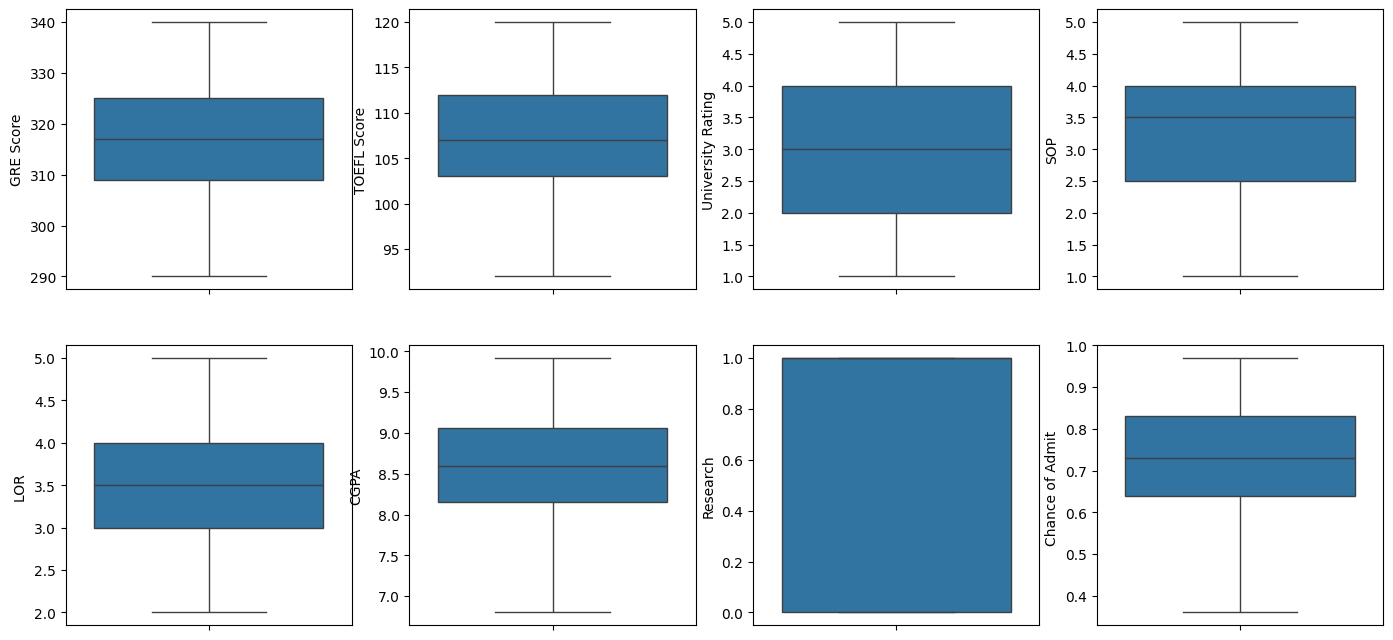

In [321]:
plt.figure(figsize=(17,8))
columns=list(df.columns)
for i in range(1,len(columns)+1):

    plt.subplot(2,4,i)
    sns.boxplot(df[columns[i-1]])

- from the above plot we can conclude that there is no outlier in the dataset now

### Final data shape

In [322]:
print(f'so final data has Row:{df.shape[0]} and column:{df.shape[1]}')

so final data has Row:486 and column:8


- out of 8 columns we will use 'Chance of Admit ' as output and other seven as features

### Dividing data into Train,Train validation and test data 

In [323]:
X=df.iloc[:,:-1]
Y=df.iloc[:,-1:]

In [324]:
X.shape

(486, 7)

In [325]:
from sklearn.preprocessing import StandardScaler

    #Standardization
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)


In [326]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [327]:
X_train.shape

(388, 7)

In [328]:
X_train, X_train_val, Y_train, Y_train_val = train_test_split(X_train, Y_train, test_size=0.2, random_state=42)

In [329]:
X_train.shape

(310, 7)

In [330]:
X_train_val.shape

(78, 7)

In [331]:
X_test.shape

(98, 7)

In [332]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train,Y_train)

LinearRegression()

#### r2_score & adjusted_r_squared for training data

In [333]:
from sklearn.metrics import r2_score
Y_pred = model.predict(X_train)

# Calculate R-squared
r_squared = r2_score(Y_train, Y_pred)

n = len(Y_train)
k = X_train.shape[1]
adjusted_r_squared = 1 - ((1 - r_squared) * (n - 1) / (n - k - 1))
print(f'r_squared for training data : {r_squared}')
print(f'adjusted_r_squared for training data: {adjusted_r_squared}')

r_squared for training data : 0.8281634389051558
adjusted_r_squared for training data: 0.824180472257262


#### r2_score & adjusted_r_squared for training validation data

In [334]:
Y_pred = model.predict(X_train_val)
r_squared=r2_score(Y_train_val,Y_pred)

n = X_train_val.shape[0]
k = X_train_val.shape[1]
adjusted_r_squared = 1 - ((1 - r_squared) * (n - 1) / (n - k - 1))

print(f'r_squared for validation data : {r_squared}')
print(f'adjusted_r_squared for validation data : {adjusted_r_squared}')

r_squared for validation data : 0.8049704217039892
adjusted_r_squared for validation data : 0.7854674638743881


- As the adjusted r2 score of training data and validation data are comparable so and efficiency of approx 80% so the model is not the best one but it's a good model

### Test the assumptions of linear regression:


#### Multicollinearity check by VIF score

In [335]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

X_t = pd.DataFrame(X_train, columns=df.columns[:-1])

vif = pd.DataFrame()

vif['Features'] = X_t.columns
vif['VIF'] = [variance_inflation_factor(X_t.values, i) for i in range(X_t.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,CGPA,4.72
0,GRE Score,4.40
1,TOEFL Score,3.50
3,SOP,2.94
2,University Rating,2.45
4,LOR,2.14
6,Research,1.55


- As VIF values are low so there is no need of removing any column of data as the features are not strongly correlated

#### Mean of residuals

In [336]:
Y_pred = model.predict(X_test)

# Calculate residuals
residuals = Y_test - Y_pred

# Analyze mean of residuals
mean_residuals = np.mean(residuals)

# Display the results
print(f"Mean of Residuals: {mean_residuals}")

Mean of Residuals: -0.008843948183225215


- very small mean residual signifies that the model is appropriate

Linearity of variables (no pattern in residual plot)

   pred  actual  residual
0  0.77    0.73    -0.035
1  0.66    0.72     0.061
2  0.85    0.87     0.015
3  0.61    0.68     0.073
4  0.73    0.79     0.056


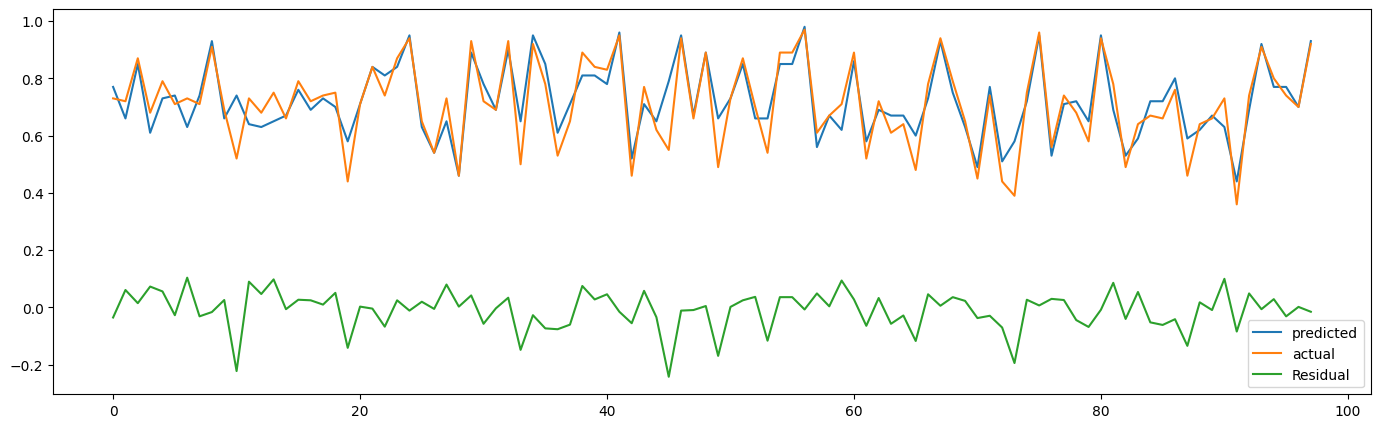

In [337]:
val=pd.DataFrame()
val['pred']=list(Y_pred.reshape(-1,).round(2))
val['actual']=list(Y_test.values.reshape(-1,))
val['residual']=list(residuals.values.reshape(-1,).round(3))
print(val.head())

plt.figure(figsize=(17,5))
plt.plot(val['pred'],label='predicted')
plt.plot(val['actual'],label='actual')
plt.plot(val['residual'],label='Residual')
plt.legend(loc='lower right' )
plt.show()

#### checking the normality of the residual 

<Axes: xlabel='residual', ylabel='Count'>

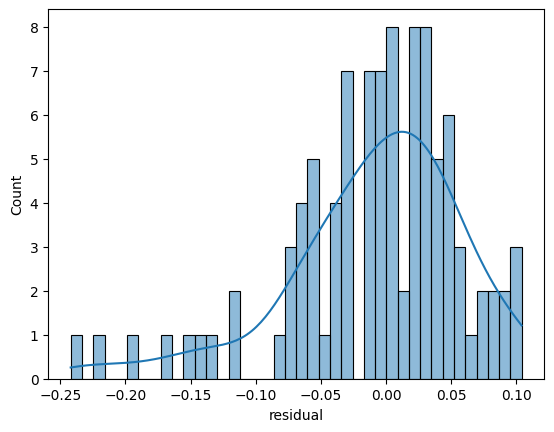

In [338]:
sns.histplot(val['residual'],bins=40,kde=True)

- from above data we can say that it is right skewed bell curve

<Axes: xlabel='pred', ylabel='actual'>

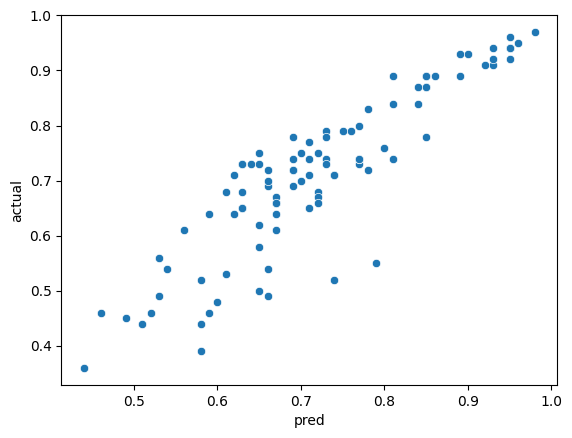

In [339]:
sns.scatterplot(val,x='pred',y='actual')

#### Test for Homoscedasticity

<Axes: xlabel='pred', ylabel='residual'>

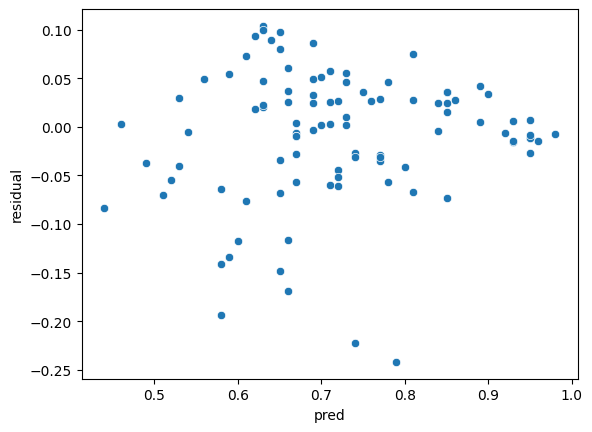

In [340]:
sns.scatterplot(val,x='pred',y='residual')

 the spread of residuals remains roughly the same as the predicted values increases

### Trying Ridge Model

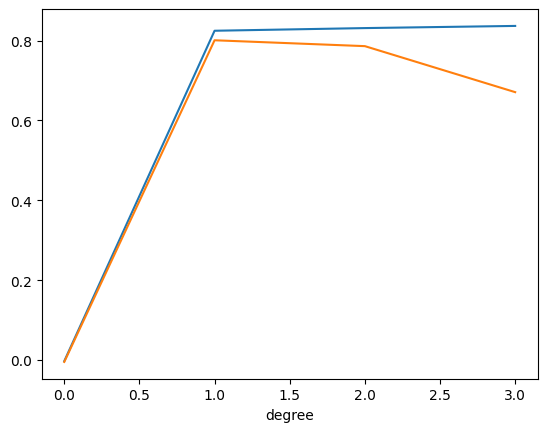

In [341]:
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge

degree=[i for i in range(4)]

train_score=[]
test_score=[]

for deg in range (4):
    poly = PolynomialFeatures(degree=deg)
    X1 = poly.fit_transform(X)


    X_train1, X_test1, Y_train1, Y_test1 = train_test_split(X1, Y, test_size=0.2, random_state=42)
    X_train_1, X_train_val1, Y_train_1, Y_train_val1 = train_test_split(X_train1, Y_train1, test_size=0.2, random_state=42)

    
    alpha = 2
    ridge_model = Ridge(alpha=alpha)
    ridge_model.fit(X_train_1, Y_train_1)

    n = len(Y_train1)
    k = X_train1.shape[1]

    r_squared=ridge_model.score(X_train_1,Y_train_1)
    adjusted_r_squared = 1 - ((1 - r_squared) * (n - 1) / (n - k - 1))    
    train_score.append(adjusted_r_squared)

    r_squared=ridge_model.score(X_train_val1,Y_train_val1)
    adjusted_r_squared = 1 - ((1 - r_squared) * (n - 1) / (n - k - 1))
    test_score.append(adjusted_r_squared)

plt.plot(degree,train_score)
plt.plot(degree,test_score)
plt.xlabel('degree')

plt.show()

- The above curve clearly shows that the degree above 1 shows overfitting 

In [342]:
X_train_val1.shape

(78, 120)

#### Degree for which test score is highest

In [343]:
max_index = test_score.index(max(test_score))
degree[max_index]


1

- As the model shows the highest efficiency at degree=1 so from here we can conclude that Polynomial features are not required for the model and hence the Ridge regression is not necessary

lets create a Ridge model of degree=2 and alpha=5 to check the efficiency

In [344]:
poly = PolynomialFeatures(degree=2)
X1 = poly.fit_transform(X)

X_train1, X_test1, Y_train1, Y_test1 = train_test_split(X1, Y, test_size=0.2, random_state=42)
X_train1, X_train_val1, Y_train1, Y_train_val1 = train_test_split(X_train1, Y_train1, test_size=0.2, random_state=42)

In [345]:
from sklearn.linear_model import Ridge
alpha = 0
ridge_model = Ridge(alpha=alpha)
ridge_model.fit(X_train1, Y_train1)

Ridge(alpha=0)

In [346]:
ridge_model.coef_

array([[-4.49269274e+12,  2.53076376e-02,  1.36436964e-02,
         8.60616141e-03,  5.35143642e-03,  1.50095163e-02,
         5.95837178e-02, -5.85458604e+10, -3.07686367e-03,
         2.68143220e-03,  4.52631697e-03, -5.90177553e-03,
         8.76861299e-03, -1.33532162e-02,  1.33781580e-02,
        -5.94585397e-03,  4.16048278e-03,  1.31735847e-02,
        -1.34022200e-02,  7.31265443e-03,  2.42320919e-03,
        -3.74216296e-03,  1.70562725e-02, -2.68093920e-03,
        -2.91620456e-03,  1.15973995e-03, -2.13055641e-02,
         8.61951402e-03,  1.47833777e-02, -6.87931240e-03,
         1.85728912e-03, -1.30074672e-02,  4.19095706e-03,
         2.39133905e-03, -1.51152947e-03, -2.07157331e+11]])

In [347]:
ridge_model.score(X_train1,Y_train1)

0.8468975430175714

In [348]:
ridge_model.score(X_test1,Y_test1)

0.7825210735958856

In [349]:
r2=model.score(X_test,Y_test)
adj_r2_lr = 1 - (1 - r2) * (len(Y_test) - 1) / (len(Y_test) - X_test.shape[1] - 1)

r2_=ridge_model.score(X_test1,Y_test1)
adj_r2_r = 1 - (1 - r2) * (len(Y_test1) - 1) / (len(Y_test1) - X_test1.shape[1] - 1)
adj_r2_r

print(f'The adj_r2 score for LinearRegression model is {adj_r2_lr}')
print(f'The adj_r2 score for ridge_model  is {adj_r2_r}')
print('As the linear model score is greater than the ridge model therefore we will choose the LinearRegression model over the Ridge model')


The adj_r2 score for LinearRegression model is 0.7723832466404138
The adj_r2 score for ridge_model  is 0.6641720032399547
As the linear model score is greater than the ridge model therefore we will choose the LinearRegression model over the Ridge model


### Trying lasso

C:\Users\sonuk\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:1474: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
C:\Users\sonuk\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_coordinate_descent.py:678: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\sonuk\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.672e-01, tolerance: 5.438e-04 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_mode

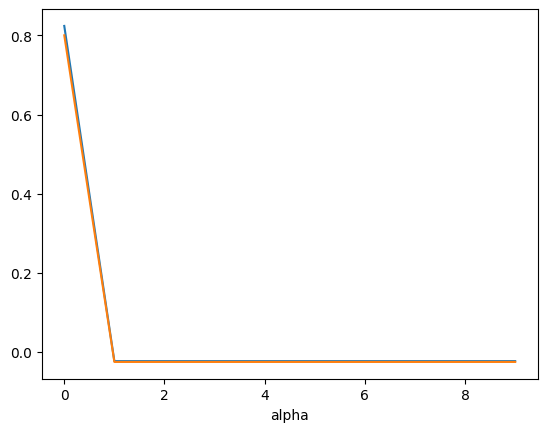

In [350]:
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso

alpha=[i for i in range(10)]

train_score=[]
test_score=[]

for alph in range (10):

    X_train1, X_test1, Y_train1, Y_test1 = train_test_split(X, Y, test_size=0.2, random_state=42)
    X_train1, X_train_val1, Y_train1, Y_train_val1 = train_test_split(X_train1, Y_train1, test_size=0.2, random_state=42)

    
    lasso_model = Lasso(alpha=alph)
    lasso_model.fit(X_train1, Y_train1)

    n = len(Y_train)
    k = X_train.shape[1]

    r_squared=lasso_model.score(X_train1,Y_train1)
    adjusted_r_squared = 1 - ((1 - r_squared) * (n - 1) / (n - k - 1))    
    train_score.append(adjusted_r_squared)

    r_squared=lasso_model.score(X_train_val1,Y_train_val1)
    adjusted_r_squared = 1 - ((1 - r_squared) * (n - 1) / (n - k - 1))
    test_score.append(adjusted_r_squared)

plt.plot(alpha,train_score)
plt.plot(alpha,test_score)
plt.xlabel('alpha')

plt.show()

In [351]:
max_index = test_score.index(max(test_score))
alpha[max_index]

0

- from the above result we can conclude that there is no need for lasso regression model in this case
- as we can see that the performance of the simple model is greater than the ridge and lasso model so we will go with the simple model i.e; LinearRegression model

## Performance of LinearRegression Model on the training data

In [352]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Make predictions on the test set
y_pred = model.predict(X_train)

# Calculate MAE
mae = mean_absolute_error(Y_train, y_pred)
print(f"Mean Absolute Error (MAE): {mae}")

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(Y_train, y_pred))
print(f"Root Mean Squared Error (RMSE): {rmse}")

# Calculate R-squared (R2)
r2 = r2_score(Y_train, y_pred)
print(f"R-squared (R2): {r2}")

# Calculate Adjusted R-squared (Adj R2)
# Add a constant term for the intercept
adj_r2 = 1 - (1 - r2) * (len(Y_train) - 1) / (len(Y_train) - X_test.shape[1] - 1)
print(f"Adjusted R-squared (Adj R2): {adj_r2}")


Mean Absolute Error (MAE): 0.03885761021016059
Root Mean Squared Error (RMSE): 0.05490198406061698
R-squared (R2): 0.8281634389051558
Adjusted R-squared (Adj R2): 0.824180472257262


## Performance of LinearRegression Model on the test data

In [353]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate MAE
mae = mean_absolute_error(Y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae}")

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(Y_test, y_pred))
print(f"Root Mean Squared Error (RMSE): {rmse}")

# Calculate R-squared (R2)
r2 = r2_score(Y_test, y_pred)
print(f"R-squared (R2): {r2}")

# Calculate Adjusted R-squared (Adj R2)
# Add a constant term for the intercept
adj_r2 = 1 - (1 - r2) * (len(Y_test) - 1) / (len(Y_test) - X_test.shape[1] - 1)
print(f"Adjusted R-squared (Adj R2): {adj_r2}")


Mean Absolute Error (MAE): 0.04935498354794582
Root Mean Squared Error (RMSE): 0.06773904018227031
R-squared (R2): 0.788809197913786
Adjusted R-squared (Adj R2): 0.7723832466404138


#### Coefficent of Respective columns are as follows

In [354]:
pd.DataFrame(model.coef_,columns=df.columns[:-1])

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,0.027569,0.013493,0.008908,0.00083,0.016415,0.06231,0.00775


## Insights & Recommendations

#### significance of predictor variables as per the coefficients of all the features are :

- According to the importance in predicting the chance of admit : CGPA > GRE Score > LOR > TOEFL Score > University Rating > Research > SOP
- CGPA has the highest coefficient so we can say that it has the most importance out of all
- Top 3 features are CGPA ,GRE Score , Letter of Recommendation
- Least important feature is Statement of Purpose

#### additional data sources for model improvement:
- 500 datapoints are too little for a good model so we need more data for training a better model


 #### Model implementation in real world:
 - The model can pridict the best chances for the students to their desired college/University
 - Students can get a list of all the colleges where they can expect to be admitted
 - Schools and Coaching institute can use it for guiding the students in the Admission process so they do not loose the chance of admission and wasting the hardwork of a year


 